# Correlate topic mixtures from MixEHR with ventilation duration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import seaborn as sns
%matplotlib inline

## Read data

In [2]:
mixtures = pd.read_csv('/home/mcb/li_lab/zwen8/data/mimic/d2_phy_48/infer/infer_result.csv', header=None)
duration = pd.read_csv('/home/mcb/li_lab/zwen8/data/mimic/d2_phy_48/vent.txt', header=None, sep=' ')
duration = duration[1].astype(np.float64)

In [3]:
print(duration.shape)
print(mixtures.shape)

(826,)
(826, 50)


In [4]:
mixtures.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,7.896194,25.325450,49.062370,28.171612,55.381585,114.641129,37.378997,1934.125272,75.154744,73.177982,...,10.458306,149.109897,12.816846,190.311150,26.287383,40.354918,48.288355,163.427479,187.641330,11.737734
1,38.230583,196.820229,103.804354,65.892508,259.870081,886.393740,24.742874,71.344213,98.922396,60.653703,...,1088.942482,234.231949,37.400009,60.909099,51.658664,22.300754,292.772476,80.515870,136.517124,31.439172
2,62.163860,58.745870,439.974392,198.471346,301.264318,847.679501,81.333169,1035.293702,99.049412,41.114422,...,3615.070685,339.046697,161.024697,25.143479,164.492117,55.010944,26.108099,189.442940,789.575027,163.864721
3,99.007686,27.412282,339.389259,51.412101,100.552610,3657.669255,63.729114,287.753919,29.219758,59.254103,...,255.407597,52.793254,105.320171,17.593607,173.344737,450.786723,86.008467,834.267468,32.730664,78.062163
4,117.847127,56.519920,49.636287,163.464343,49.717566,637.006501,14.690521,406.929284,284.505057,156.599912,...,151.828683,36.009044,108.958213,159.454871,14.756316,66.113372,141.814496,208.343489,78.076893,106.165659


In [5]:
duration.head()

0    542.000000
1     42.000000
2    182.383333
3    402.250000
4    253.816667
Name: 1, dtype: float64

## Normalize

In [6]:
normed_mixtures = pd.DataFrame(normalize(mixtures.iloc[:,2:51], norm='l1', axis=1))

In [7]:
mixtures.sum(axis=1)

0      12116.0
1       8750.0
2      13776.0
3      24708.0
4      10887.0
        ...   
821    18292.0
822     5089.0
823     1968.0
824    10198.0
825     9156.0
Length: 826, dtype: float64

## See if mixture's rows sum up to 1

In [8]:
normed_mixtures.sum(axis=1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
821    1.0
822    1.0
823    1.0
824    1.0
825    1.0
Length: 826, dtype: float64

## Heatmap

In [9]:
normed_mixtures.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.004061,0.002332,0.004584,0.009488,0.003094,0.160073,0.006220,0.006056,0.043022,0.002808,...,0.000866,0.012341,0.001061,0.015751,0.002176,0.003340,0.003996,0.013526,0.015530,0.000971
1,0.012191,0.007738,0.030519,0.104099,0.002906,0.008379,0.011617,0.007123,0.002254,0.014656,...,0.127886,0.027508,0.004392,0.007153,0.006067,0.002619,0.034383,0.009456,0.016033,0.003692
2,0.032221,0.014535,0.022062,0.062078,0.005956,0.075817,0.007254,0.003011,0.045787,0.008582,...,0.264742,0.024829,0.011792,0.001841,0.012046,0.004029,0.001912,0.013873,0.057823,0.012000
3,0.013807,0.002091,0.004091,0.148797,0.002593,0.011706,0.001189,0.002411,0.004274,0.005175,...,0.010390,0.002148,0.004285,0.000716,0.007052,0.018338,0.003499,0.033939,0.001332,0.003176
4,0.004633,0.015259,0.004641,0.059463,0.001371,0.037986,0.026558,0.014618,0.007134,0.059994,...,0.014173,0.003361,0.010171,0.014885,0.001377,0.006172,0.013238,0.019448,0.007288,0.009910


In [65]:
sorted_normed_mixtures = normed_mixtures.sort_values(by=normed_mixtures.columns[17], ascending=False)

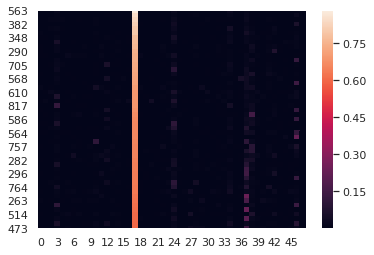

In [66]:
sns.set()
sns.heatmap(sorted_normed_mixtures.head(50))

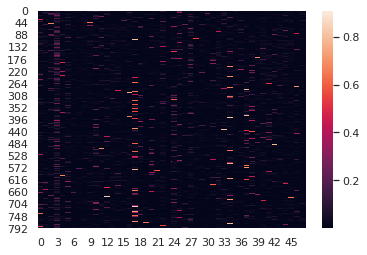

In [12]:
sns.heatmap(normed_mixtures)

## Compute correlation

In [13]:
corr = normed_mixtures.apply(lambda mixture: mixture.corr(duration, method='pearson'))

In [14]:
corr_sorted = corr.sort_values(ascending=False)

Text(0, 0.5, 'Pearson Correlation')

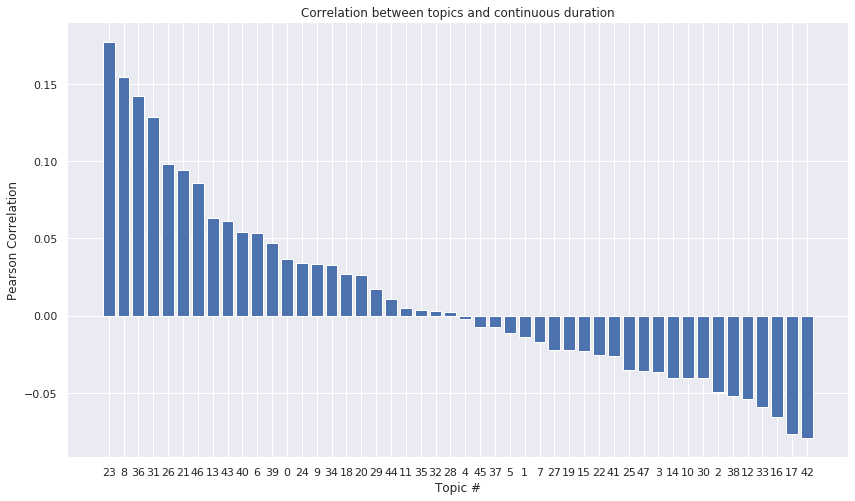

In [15]:
plt.figure(figsize=(14, 8))
plt.bar(x=range(len(corr)), height=corr_sorted)
plt.title('Correlation between topics and continuous duration')
plt.xlabel('Topic #')
plt.xticks(range(len(corr)), corr_sorted.index)
plt.ylabel('Pearson Correlation')

## Select most correlated topics and map back to words

In [16]:
def find_max_n(numbers, n=3):
    sorted_numbers = sorted(numbers, reverse=True)
    return [numbers.index(number) for number in sorted_numbers[0:n]]

In [17]:
top_pos = find_max_n(list(corr), 3)
top_neg = find_max_n(list(-corr), 3)

In [18]:
top_neg

[42, 17, 16]

In [19]:
top_topics = top_pos + top_neg
top_topics

[23, 8, 36, 42, 17, 16]

## Extract top words in those top topics

In [20]:
phis_df = pd.read_csv(r'/home/mcb/li_lab/zwen8/data/mimic/d2_phy_48/data_JCVB0_nmar_K50_iter762_phi_normalized.csv', header=None)

In [21]:
phis_df.columns = ['PLACE_HOLD', 'WORD_ID'] + [str(idx) for idx in range(50)]

In [22]:
phis_df.head()

,PLACE_HOLD,WORD_ID,0,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,49
0,1,0,2.495740e-05,5.367500e-07,1.631660e-04,8.010700e-07,4.317350e-07,2.695230e-07,4.307860e-07,3.416060e-07,...,1.035560e-05,7.148990e-07,1.819990e-04,7.783400e-07,2.024530e-04,7.559230e-07,9.668140e-05,1.560030e-04,4.475260e-07,3.270350e-05
1,1,1,4.250630e-07,2.751060e-07,6.674120e-05,4.014040e-07,3.398690e-04,2.373540e-07,7.068540e-07,8.593120e-07,...,2.771160e-07,6.607280e-07,2.970230e-07,1.256600e-06,3.947990e-04,4.080130e-07,3.117150e-07,4.536600e-07,3.838520e-07,2.793640e-04
2,1,2,1.821320e-05,9.676480e-08,8.726380e-08,1.346290e-07,1.172210e-07,4.924340e-08,8.651790e-08,8.387930e-08,...,1.692270e-07,1.791780e-07,1.760510e-07,1.641630e-07,8.323600e-08,1.436630e-07,2.659740e-07,1.841260e-07,1.145240e-07,1.549770e-07
3,1,3,1.336370e-07,8.779000e-08,5.204740e-08,1.442400e-07,6.255220e-08,3.212690e-08,7.999480e-08,1.124300e-07,...,5.936830e-06,1.696280e-07,9.687940e-08,1.037640e-07,7.736650e-08,1.114230e-07,1.053540e-07,1.486810e-07,1.059410e-07,1.354020e-07
4,1,4,2.669620e-05,1.649320e-05,8.342460e-06,1.827940e-06,2.345000e-05,4.413430e-07,2.541670e-07,3.043600e-07,...,5.117680e-06,1.615920e-04,3.359840e-07,6.977320e-06,2.759580e-07,3.733270e-07,1.499520e-06,4.324750e-07,3.092930e-07,4.145940e-07


In [23]:
cols = ['WORD_ID'] + [str(value) for value in top_topics]

In [24]:
top_phis_df = phis_df[cols]

In [25]:
top_phis_df.head()

,WORD_ID,23,8,36,42,17,16
0,0,5.510780e-07,6.622670e-07,2.926420e-05,1.819990e-04,5.097210e-07,1.779240e-04
1,1,5.169000e-07,6.174380e-07,6.984560e-04,2.970230e-07,7.214040e-07,4.316400e-07
2,2,2.116680e-07,2.392710e-07,6.086930e-08,1.760510e-07,1.736850e-07,2.467360e-07
3,3,1.566050e-07,1.850430e-07,5.627170e-08,9.687940e-08,1.470040e-07,1.099550e-07
4,4,4.747570e-07,5.433380e-07,1.503940e-07,3.359840e-07,4.642650e-07,4.744520e-07


In [64]:
top_phis_df.sort_values(by='17', ascending=False)

,WORD_ID,23,8,36,42,17,16
6790,6790,8.074340e-03,4.840780e-03,2.122830e-02,1.125170e-02,1.129550e-02,4.150290e-03
5571,5571,1.391090e-02,1.851770e-02,2.351420e-02,1.265570e-02,9.693500e-03,9.588760e-03
3923,3923,9.474870e-07,9.567250e-04,1.120950e-03,8.988170e-07,9.489880e-03,1.195760e-06
7179,7179,7.190000e-03,6.323880e-03,8.828430e-03,6.355660e-03,8.002770e-03,1.195630e-02
5028,5028,1.680070e-03,1.021340e-03,4.433570e-03,2.845320e-03,6.371220e-03,9.229180e-04
...,...,...,...,...,...,...,...
4734,4734,3.770950e-08,4.414370e-08,1.378850e-08,2.386780e-08,3.617050e-08,2.746230e-08
1537,1537,3.647770e-08,4.263250e-08,1.334960e-08,2.330200e-08,3.501550e-08,2.646310e-08
8958,8958,3.531590e-08,4.128980e-08,1.288300e-08,2.257440e-08,3.391910e-08,2.563590e-08
3123,3123,3.414610e-08,3.994020e-08,1.498700e-04,2.144610e-08,3.253030e-08,2.430520e-08


In [27]:
vocab_df = pd.read_csv(r'/home/mcb/li_lab/zwen8/data/mimic/d2_phy_48/vocab.txt', header=None)

In [28]:
vocab_df.columns = ['WORD', 'WORD_ID']

In [29]:
vocab_df.head()

,WORD,WORD_ID
0,aa,0
1,aaa,1
2,aado,2
3,aao,3
4,aaox,4


In [30]:
top_words_bytopic = [top_phis_df.sort_values(by=str(topic), ascending=False)['WORD_ID'][0:10] for topic in top_topics]
top_words = []
for sublist in top_words_bytopic:
    for word in sublist:
        top_words.append(word)

In [31]:
word_topic_matrix = top_phis_df.iloc[[word_id for word_id in top_words]]

In [32]:
word_topic_matrix.head()

,WORD_ID,23,8,36,42,17,16
5571,5571,0.013911,0.018518,0.023514,0.012656,0.009694,0.009589
5467,5467,0.008315,0.008109,0.008646,0.007066,0.005549,0.002981
7730,7730,0.008280,0.002866,0.002783,0.007311,0.004107,0.003292
6790,6790,0.008074,0.004841,0.021228,0.011252,0.011295,0.004150
5845,5845,0.007802,0.001047,0.000140,0.000834,0.002744,0.002475


In [33]:
yticklabels = [vocab_df[vocab_df['WORD_ID'] == word_id]['WORD'].values[0] for word_id in top_words]
xticklabels = ['23(pos)', '8(pos)', '36(pos)', '42(neg)', '17(neg)', '16(neg)']

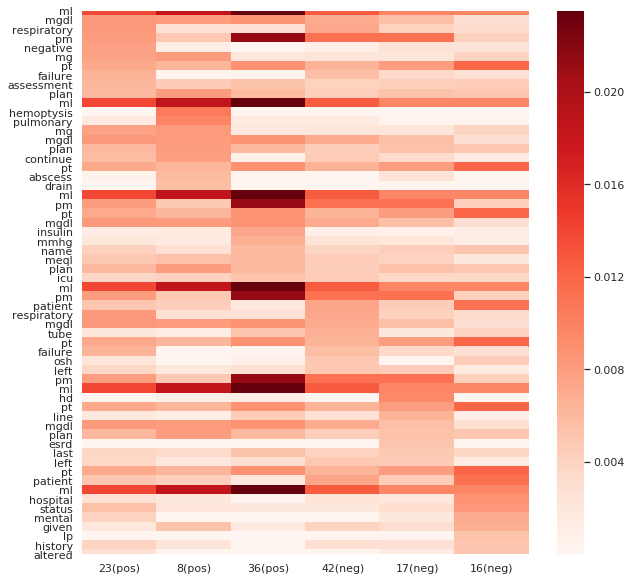

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(word_topic_matrix.iloc[:, 1:], yticklabels=yticklabels, xticklabels=xticklabels, cmap='Reds')

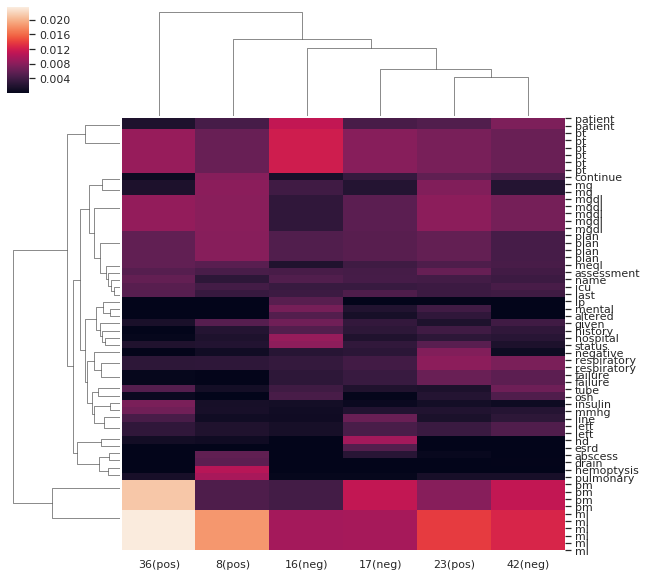

In [35]:
sns.set()
sns.clustermap(word_topic_matrix.iloc[:, 1:], yticklabels=yticklabels, xticklabels=xticklabels)

## Binary duration
Threshold at 7 day

In [36]:
binary_duration = (duration > 7 * 24).astype(int)

In [37]:
bi_corr = normed_mixtures.apply(lambda mixture: mixture.corr(binary_duration, method='pearson'))

In [38]:
bi_corr_sorted = bi_corr.sort_values(ascending=False)

Text(0, 0.5, 'Pearson Correlation')

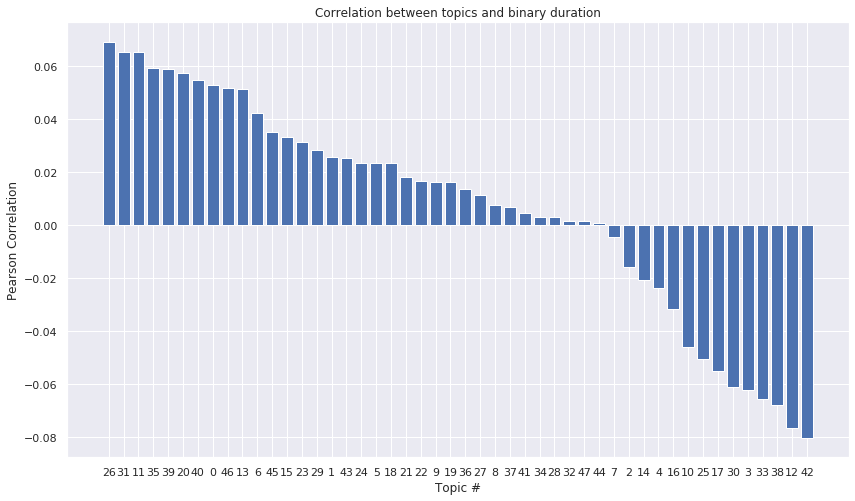

In [39]:
plt.figure(figsize=(14,8))
plt.bar(x=range(len(bi_corr)), height=bi_corr_sorted)
plt.title('Correlation between topics and binary duration')
plt.xlabel('Topic #')
plt.xticks(range(len(bi_corr)), bi_corr_sorted.index)
plt.ylabel('Pearson Correlation')

## Select most correlated topics and map back to words

In [44]:
bi_top_topics = find_max_n(list(np.abs(bi_corr)), 6)

In [45]:
bi_top_pos = find_max_n(list(bi_corr), 3)
bi_top_neg = find_max_n(list(-bi_corr), 3)

In [46]:
bi_top_topics = bi_top_pos + bi_top_neg
bi_top_topics

[26, 31, 11, 42, 12, 38]

## Extract top words in those top topics

In [47]:
bi_cols = ['WORD_ID'] + [str(value) for value in bi_top_topics]

In [48]:
bi_top_phis_df = phis_df[bi_cols]

In [49]:
bi_top_phis_df.head()

,WORD_ID,26,31,11,42,12,38
0,0,2.339180e-07,4.166600e-07,5.106030e-07,1.819990e-04,8.773500e-06,1.125730e-06
1,1,9.495510e-04,4.600920e-07,2.235610e-06,2.970230e-07,2.331800e-04,5.118780e-07
2,2,6.622110e-08,1.440460e-07,1.845550e-07,1.760510e-07,8.702190e-08,1.201630e-07
3,3,6.130570e-08,1.324670e-07,1.067650e-07,9.687940e-08,2.645050e-07,1.112870e-07
4,4,3.844010e-07,4.508960e-07,3.564020e-07,3.359840e-07,5.159650e-07,3.388840e-07


In [50]:
bi_top_phis_df.sort_values(by='11', ascending=False)

,WORD_ID,26,31,11,42,12,38
5571,5571,1.869260e-02,5.433650e-03,1.121880e-02,1.265570e-02,5.969130e-03,9.823390e-03
6296,6296,1.041940e-06,2.191560e-03,9.563720e-03,4.942250e-03,5.818610e-04,1.094690e-06
6790,6790,1.098670e-02,5.718580e-03,8.539860e-03,1.125170e-02,5.092380e-03,4.550920e-03
5782,5782,6.230220e-03,8.027730e-03,7.591770e-03,3.701900e-03,6.171790e-03,6.499640e-03
7179,7179,1.051750e-02,1.915530e-02,6.949570e-03,6.355660e-03,1.630220e-02,8.504990e-03
...,...,...,...,...,...,...,...
4734,4734,1.525860e-08,3.257680e-08,2.612800e-08,2.386780e-08,1.990490e-08,2.739440e-08
1537,1537,1.447390e-08,3.123720e-08,2.539460e-08,2.330200e-08,1.906970e-08,2.634230e-08
8958,8958,1.401360e-08,3.025370e-08,2.459310e-08,2.257440e-08,1.847010e-08,2.551260e-08
3123,3123,1.375990e-08,2.927320e-08,2.364300e-08,2.144610e-08,1.786830e-08,2.465560e-08


In [51]:
vocab_df = pd.read_csv(r'/home/mcb/li_lab/zwen8/data/mimic/d2_phy_48/vocab.txt', header=None)

In [52]:
vocab_df.columns = ['WORD', 'WORD_ID']

In [53]:
vocab_df.head()

,WORD,WORD_ID
0,aa,0
1,aaa,1
2,aado,2
3,aao,3
4,aaox,4


In [54]:
bi_top_words_bytopic = [bi_top_phis_df.sort_values(by=str(topic), ascending=False)['WORD_ID'][0:10] for topic in bi_top_topics]
bi_top_words = []
for sublist in bi_top_words_bytopic:
    for word in sublist:
        bi_top_words.append(word)

In [55]:
bi_word_topic_matrix = bi_top_phis_df.iloc[[word_id for word_id in bi_top_words]]

In [56]:
bi_word_topic_matrix.head()

,WORD_ID,26,31,11,42,12,38
5571,5571,0.018693,0.005434,0.011219,0.012656,0.005969,0.009823
6747,6747,0.011162,0.007880,0.005249,0.004329,0.008287,0.009149
6790,6790,0.010987,0.005719,0.008540,0.011252,0.005092,0.004551
670,670,0.010769,0.007153,0.004421,0.004073,0.007224,0.008226
7179,7179,0.010517,0.019155,0.006950,0.006356,0.016302,0.008505


In [57]:
bi_yticklabels = [vocab_df[vocab_df['WORD_ID'] == word_id]['WORD'].values[0] for word_id in bi_top_words]
bi_xticklabels = ['26(pos)', '31(pos)', '11(pos)', '42(neg)', '12(neg)', '38(neg)']

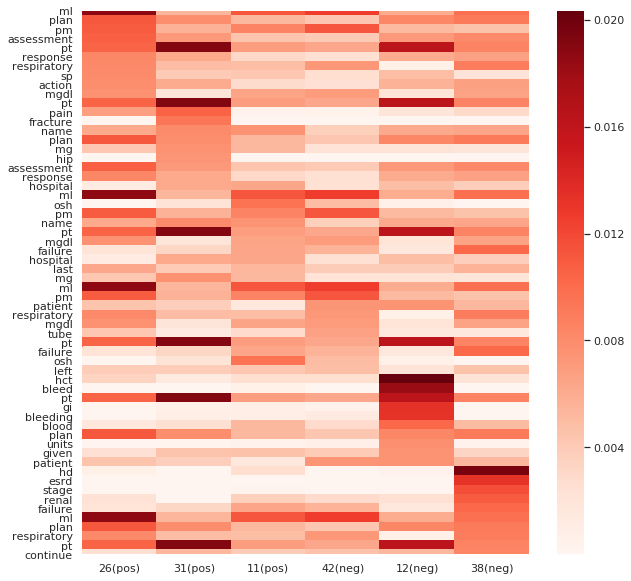

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(bi_word_topic_matrix.iloc[:, 1:], yticklabels=bi_yticklabels, xticklabels=bi_xticklabels, cmap='Reds')

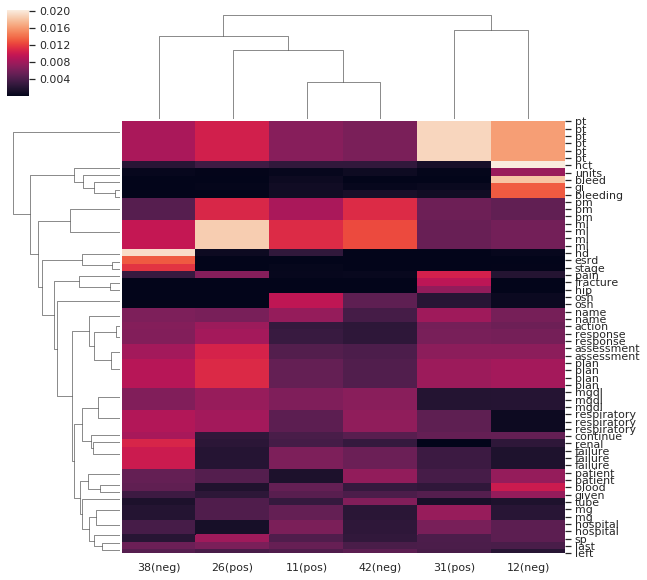

In [59]:
sns.set()
sns.clustermap(bi_word_topic_matrix.iloc[:, 1:], yticklabels=bi_yticklabels, xticklabels=bi_xticklabels)